 # Udacity DSND Project 1: Blog Post

### Table of Contents

- Project overview
- Business understanding
- Data understanding
- Data preparation
- Data modelling and results evaluation
- Conclusions

# Project overview


This is the Blog Post Project for the Data Scientist ND. We will be applying CRISP-DM approach to the TMDb movie dataset. This dataset contains information about 10,000 movies regarding the following: budget, revenue, user rating, vote, genre and release year. It covers the period from 1960 to 2015.

The libraries used in this project include pandas, numpy, seaborn, matplotlib.


## Business Understanding

We will try to answer the following three questions:

- Which genres are the most popular?
- Which genres are associated with the highest revenues?
- What movie properties have highest impact on revenue?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load data and display few rows. 

movies = pd.read_csv('tmdb-movies.csv')
movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

## Data understanding

To understand the data, we need to walkthrough the dataset

In [3]:
#Get modies information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movies.shape

(10866, 21)

In [5]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**From the above results, we observe the following**

- Columns count: 21
- Rows count: 10866


## Data preparation

The following steps are applied to prepare and clean the data, inspired by what was presented in the classroom:

- Delete columns that will not be used in the analysis.
- Delete duplicate values.
- Delete missing values and zero values in budget and revenue columns.
- split the multivalue data in the genre column.

In [6]:
#drop unnecessary columns
movies.drop(['homepage','tagline','overview','production_companies','release_date','vote_count','keywords','imdb_id','budget_adj','revenue_adj','cast'] , axis=1 , inplace=True)
movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015


In [7]:
movies.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

From the above results, we observe that the genre column has 23 missing values that will be deleted.

In [8]:
movies.dropna(inplace = True)

In [9]:
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

#### To use dropna, we need to convert zero values to null values first.

In [10]:
movies['budget'] = movies['budget'].replace(0, np.NAN)

In [11]:
movies['revenue'] = movies['revenue'].replace(0, np.NAN)

In [12]:
movies.dropna(inplace = True)

In [13]:
#check
movies.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

**Check for duplicate values**

In [14]:
movies.duplicated().sum()

1

**Drop it**


In [15]:
movies.drop_duplicates(inplace= True)

In [16]:
#check
movies.duplicated().sum()

0

In [17]:
#Prepare the genre column
movies['genres'] = movies.genres.str.split("|",expand=True)
movies.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action,7.3,2015


In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3853 non-null   int64  
 1   popularity      3853 non-null   float64
 2   budget          3853 non-null   float64
 3   revenue         3853 non-null   float64
 4   original_title  3853 non-null   object 
 5   director        3853 non-null   object 
 6   runtime         3853 non-null   int64  
 7   genres          3853 non-null   object 
 8   vote_average    3853 non-null   float64
 9   release_year    3853 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 331.1+ KB


## Data modelling and results evaluation

### Question 1- Which genres are the most popular?

In [19]:
#count number of movies per genre
number_movies= movies.groupby('genres').release_year.count()
number_movies

genres
Action             689
Adventure          314
Animation          103
Comedy             787
Crime              171
Documentary         32
Drama              889
Family              40
Fantasy            110
History             17
Horror             275
Music               29
Mystery             36
Romance             66
Science Fiction     98
TV Movie             1
Thriller           160
War                 20
Western             16
Name: release_year, dtype: int64

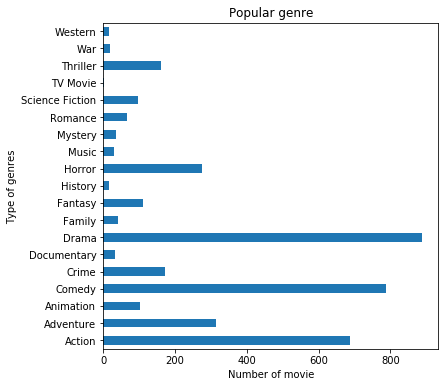

In [20]:
#Visualise the results
chart = number_movies.plot.barh(figsize = (6,6))
chart.set(title = 'Popular genre')
chart.set_ylabel('Type of genres')
chart.set_xlabel('Number of movie');

- The most popular genres are Drama, Comedy and Action whereas the least popular are TV movies, Western, War and History.

### Question 2 - Which genres are associated with the highest revenues?

In [21]:
top_revenue_genres = movies.groupby('genres').revenue.max()
top_revenue_genres

genres
Action             2.781506e+09
Adventure          1.327818e+09
Animation          1.274219e+09
Comedy             8.537086e+08
Crime              1.106280e+09
Documentary        1.191145e+08
Drama              1.845034e+09
Family             1.156731e+09
Fantasy            8.908716e+08
History            4.492209e+08
Horror             4.706540e+08
Music              3.843356e+08
Mystery            6.728063e+08
Romance            5.423514e+08
Science Fiction    1.519558e+09
TV Movie           4.200000e+07
Thriller           7.582399e+08
War                6.505234e+08
Western            5.329505e+08
Name: revenue, dtype: float64

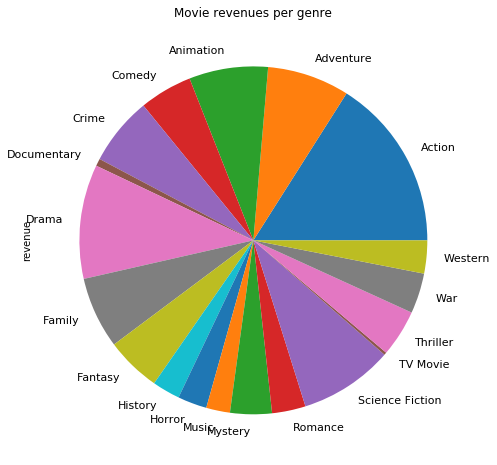

In [22]:
#Visualise the results
highest_revenue = top_revenue_genres.plot.pie(fontsize = 11,figsize=(10, 8))
highest_revenue.set(title = 'Movie revenues per genre');

Highest revenues are associated with Action and Drama, which is not surprising as they are among the most popular as well.

### Question 3 - What movie properties have highest impact on revenue?

In [23]:
# Find genres with above average revenue
revenue_ave = movies['revenue'].mean()
revenue_ave
higher_revenue = movies['revenue'] > revenue_ave
lower_revenue = movies['revenue'] <= revenue_ave
higher_revenue.value_counts()

False    2746
True     1107
Name: revenue, dtype: int64

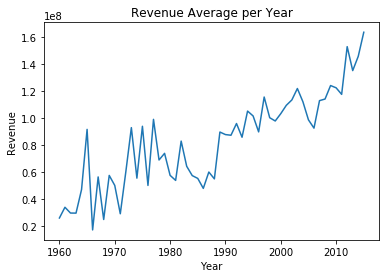

In [24]:
#Check if the release year has an impact on the average revenue
movies.groupby('release_year')['revenue'].mean().plot(kind='line');
plt.title('Revenue Average per Year')
plt.ylabel('Revenue')
plt.xlabel('Year');

Although the curve is clumsy, we can see that movie revenues get higher as the years pass. This may indicate more interest in movies in recent years.

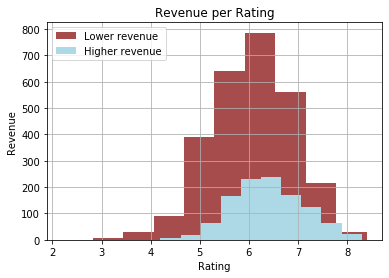

In [25]:
#Check if the movie rating has an impact on revenues
movies.vote_average[lower_revenue].hist(alpha=0.7,color='maroon' , label='Lower revenue')
movies.vote_average[higher_revenue].hist(color ='lightblue' , label='Higher revenue')
plt.title('Revenue per Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.legend();

Obviously, movies with lower revenues are associated with lower ratings.

## Conclusions

To sum up, great business insights can be taken from the TMDb movies dataset. It was interesting to learn that the most popular genre is Drama while the least popular is TV movies. Action movies has the highest revenues. We noticed that movie revenues got highr in recent years and that movies with low ratings negatively influence the revenue.